In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')
import paramselect
import os
import fnmatch
def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))

In [2]:
from paramselect import fit
from pycalphad import Database, equilibrium
dbf = fit('input.json', datasets, saveall=True)

FITTING:  LIQUID
2 endmembers (2 distinct by symmetry)
ENDMEMBER: ('AL',)
SYMMETRIC_ENDMEMBERS:  [('AL',)]
ENDMEMBER: ('NI',)
SYMMETRIC_ENDMEMBERS:  [('NI',)]
1 distinct binary interactions
INTERACTION: (('AL', 'NI'),)
ENDMEMBERS FROM INTERACTION: [('AL',), ('NI',)]
['CPM_FORM', 'CPM_MIX']: datasets found: 0
['SM_FORM', 'SM_MIX']: datasets found: 0
['HM_FORM', 'HM_MIX']: datasets found: 1
[YS] rss: 94032758.7985 AIC: 350.82392177
[YS, YS*Z] rss: 74222612.3634 AIC: 348.3290088
[YS, YS*Z, YS*Z**2] rss: 5870112.86861 AIC: 302.122303974
[YS, YS*Z, YS*Z**2, YS*Z**3] rss: 5504592.61518 AIC: 302.900773131
[-197437.0 14423.4 61412.5 0.0 0 0 0 0 0 0]
FITTING:  FCC_L12
16 endmembers (5 distinct by symmetry)
ENDMEMBER: ('AL', 'AL', 'AL', 'AL', 'VA')
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'AL', 'AL', 'NI', 'VA')
['CPM_FORM']: datasets found: 0
['SM_FORM']: datasets found: 1
(T,) rss: 0.0 AIC: -inf
['HM_FORM']: datasets found: 3
(1,) rss: 126001.34 AIC: 37.2321434

In [3]:
print(dbf.to_string(fmt='tdb', groupby='phase'))

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$ Date: 2016-03-21 12:27
$ Components: AL, NI, VA
$ Phases: AL3NI1, AL3NI2, AL3NI5, BCC_B2, FCC_L12, LIQUID
$ Generated by rotis (pycalphad 0.3.2+14.ge9fe869.dirty)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

ELEMENT AL BLANK 0 0 0 !
ELEMENT NI BLANK 0 0 0 !
ELEMENT VA BLANK 0 0 0 !

FUNCTION GBCCAL 298.15 -4.813*T + GHSERAL# + 10083; 2900.0 N !
FUNCTION GBCCNI 298.15 -3.556*T + GHSERNI# + 8715.084; 3000.0 N !
FUNCTION GFCCAL 298.15 GHSERAL#; 2900.0 N !
FUNCTION GFCCNI 298.15 GHSERNI#; 3000.0 N !
FUNCTION GHSERAL 298.15 -8.77664E-7*T**3 - 0.001884662*T**2 -
   24.3671976*T*LN(T) + 137.093038*T - 7976.15 + 74092*T**(-1); 700.0 Y
   -5.764227E-6*T**3 + 0.018531982*T**2 - 38.5844296*T*LN(T) + 223.048446*T -
   11276.24 + 74092*T**(-1); 933.47 Y -31.748192*T*LN(T) + 188.684153*T -
   11278.378 - 1.230524E+28*T**(-9); 2900.0 N !
FUNCTION GHSERNI 298.15 -0.0048407*T**2 - 22.096*

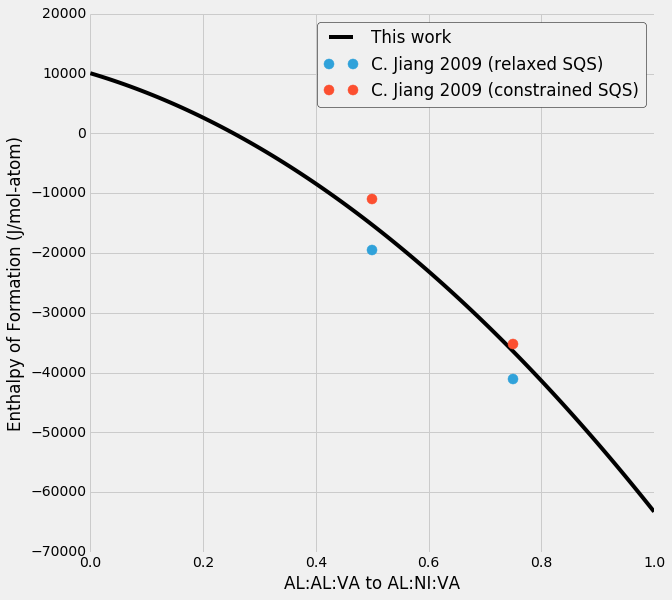

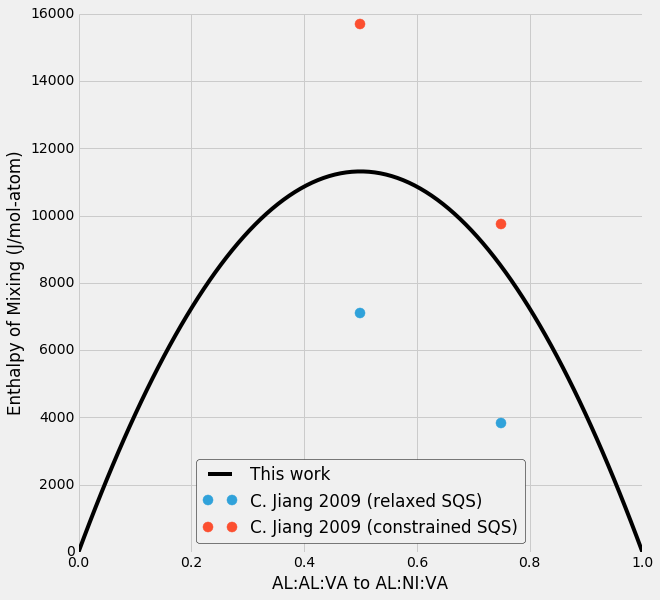

In [4]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", ["AL", "NI"], "VA"], [[0, 1]], datasets)

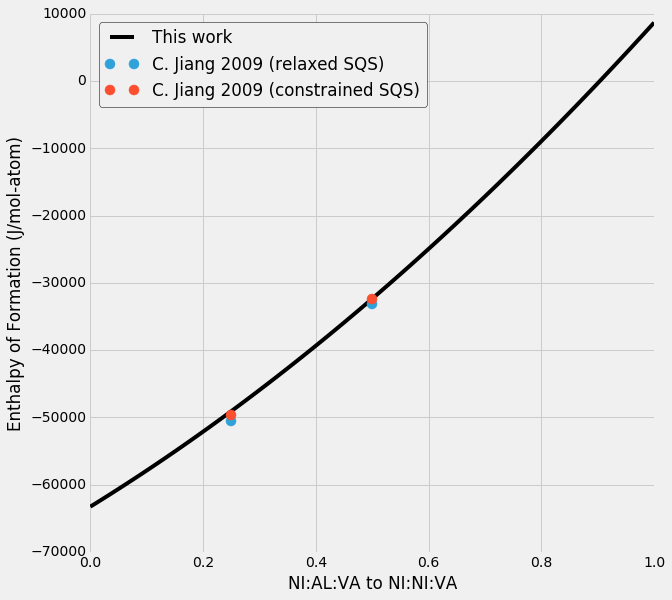

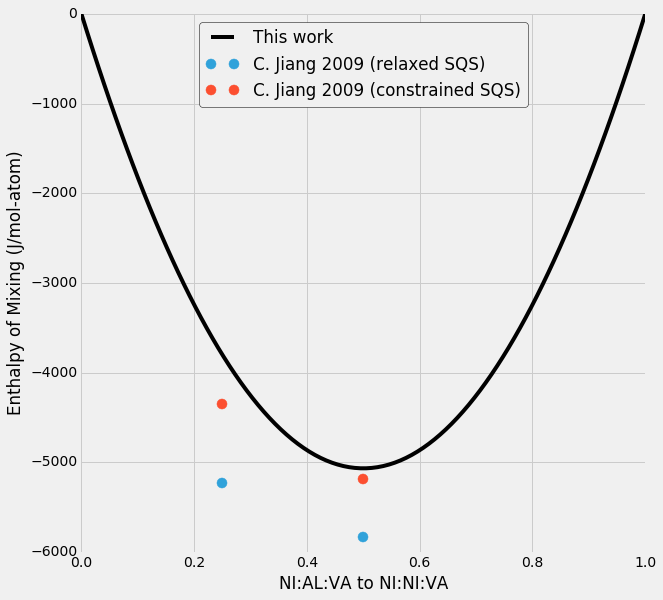

In [5]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["NI", ["AL", "NI"], "VA"], [[0, 1]], datasets)

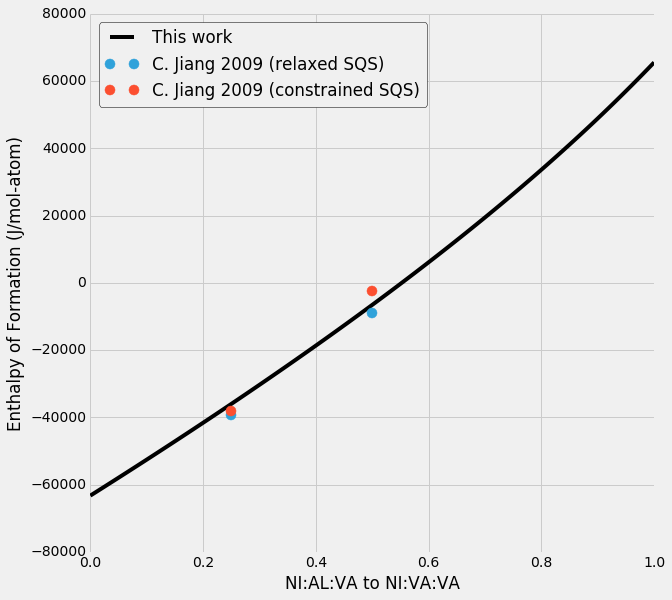

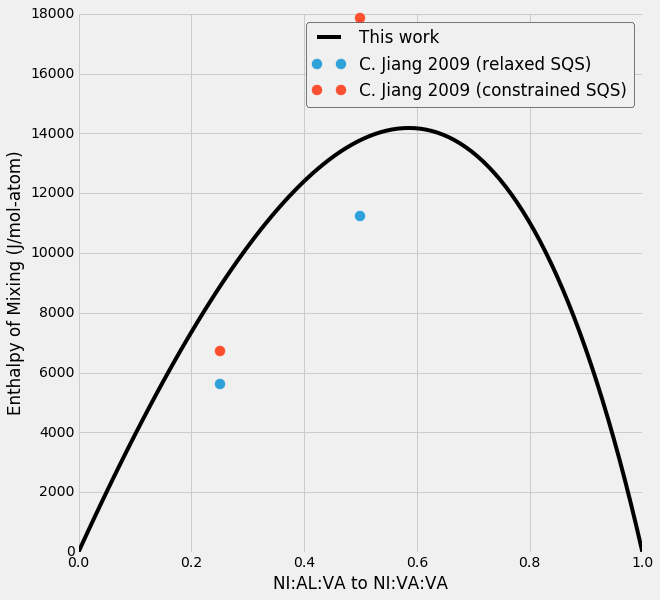

In [6]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["NI", ["AL", "VA"], "VA"], [[0, 1]], datasets)

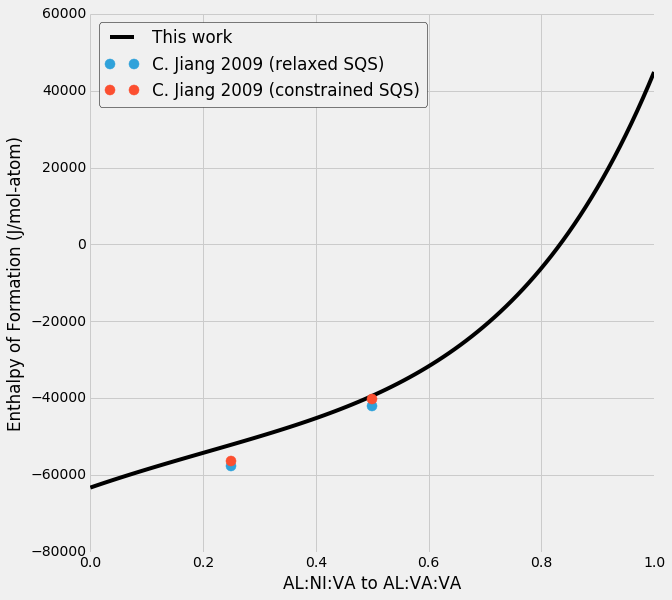

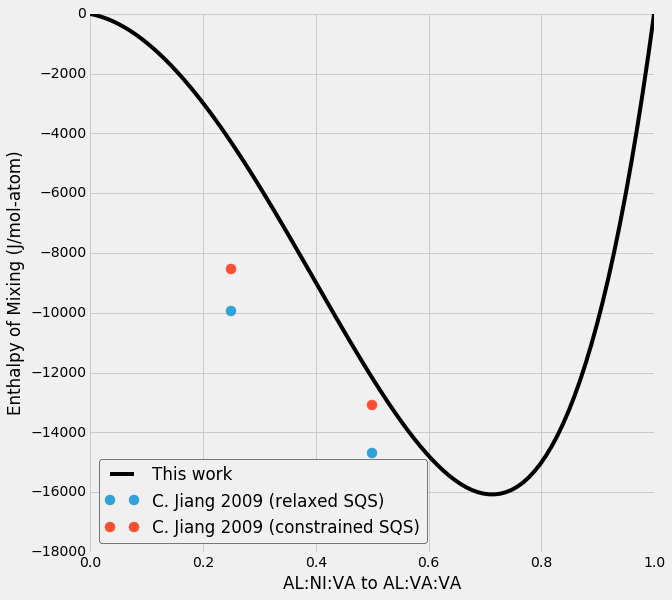

In [7]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", ["NI", "VA"], "VA"], [[0, 1]], datasets)

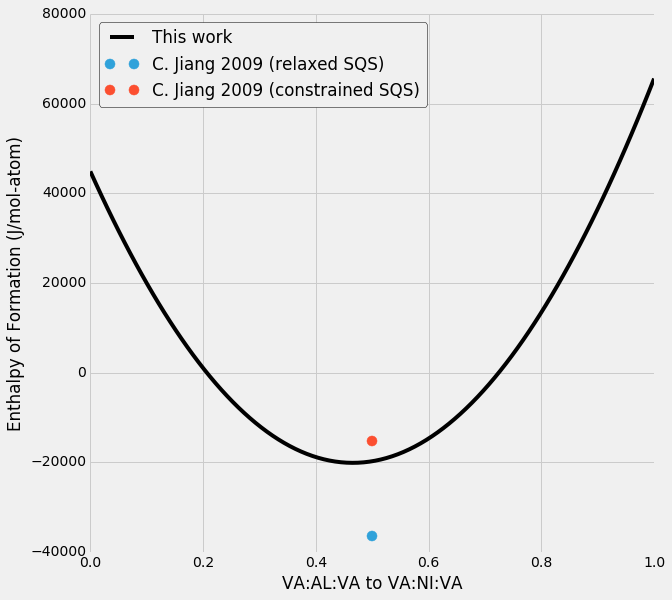

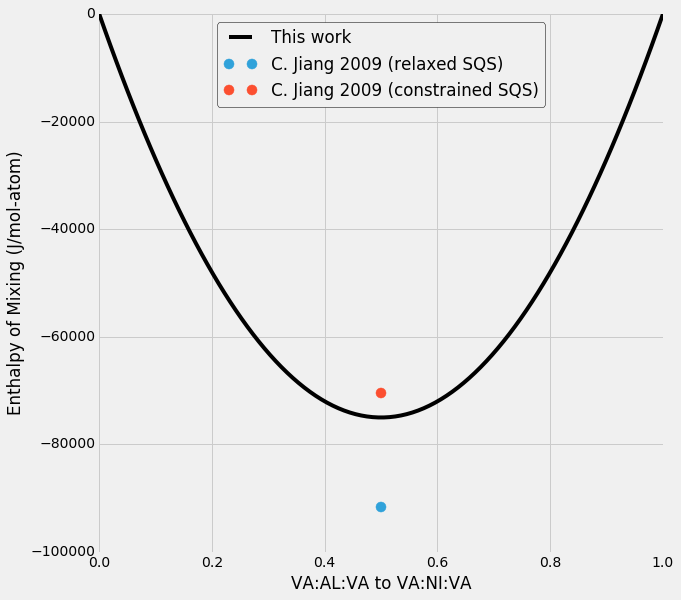

In [8]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["VA", ["AL", "NI"], "VA"], [[0, 1]], datasets)

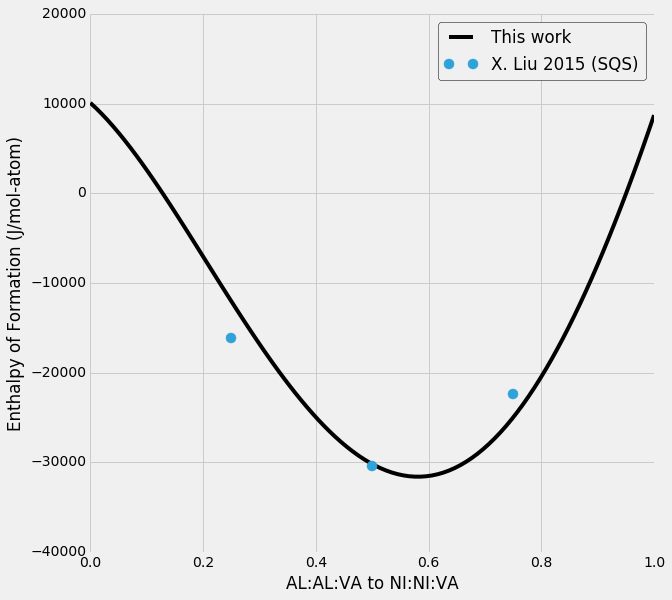

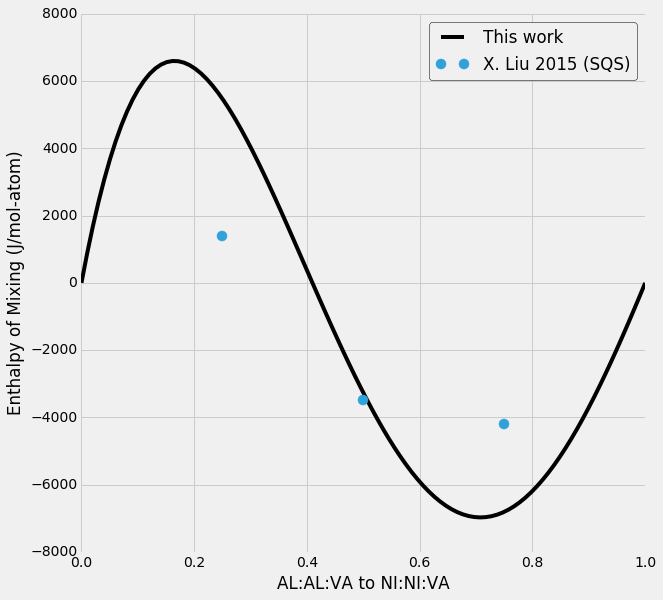

In [9]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", [["AL", "NI"], ["AL", "NI"], "VA"], [[0, 1]], datasets)

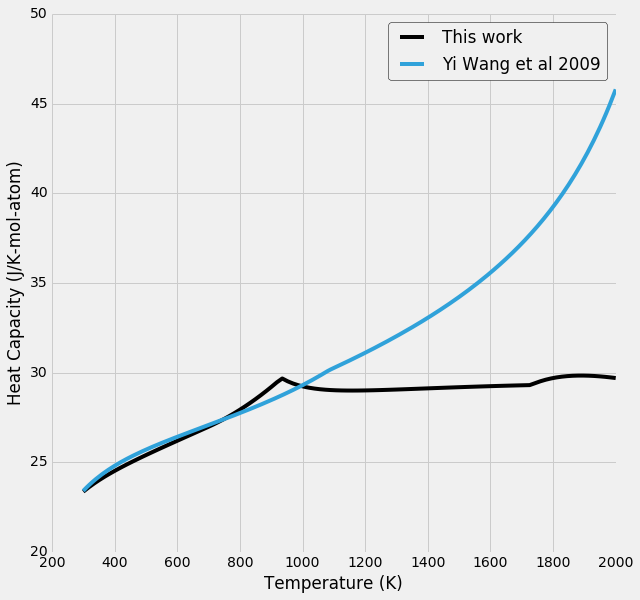

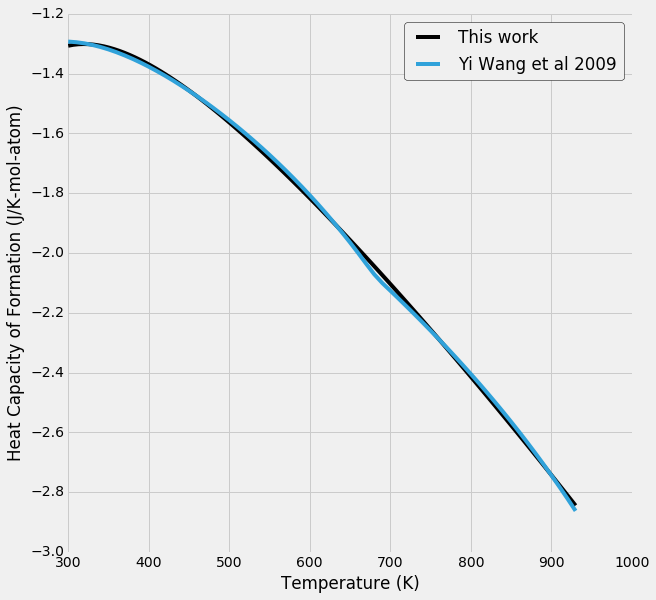

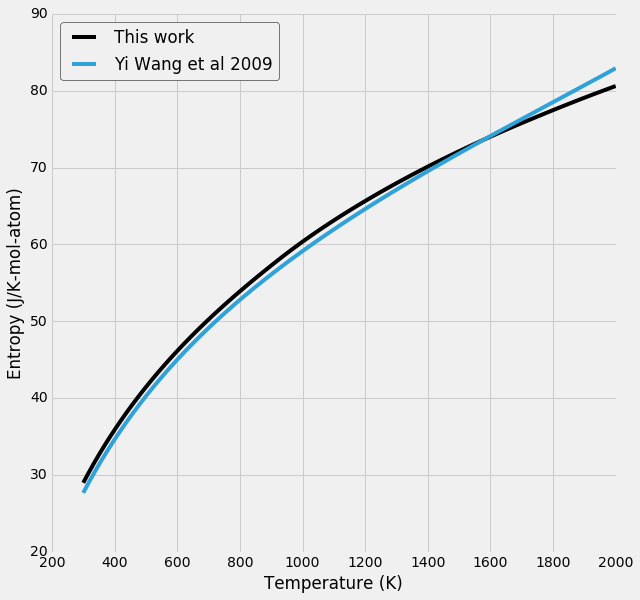

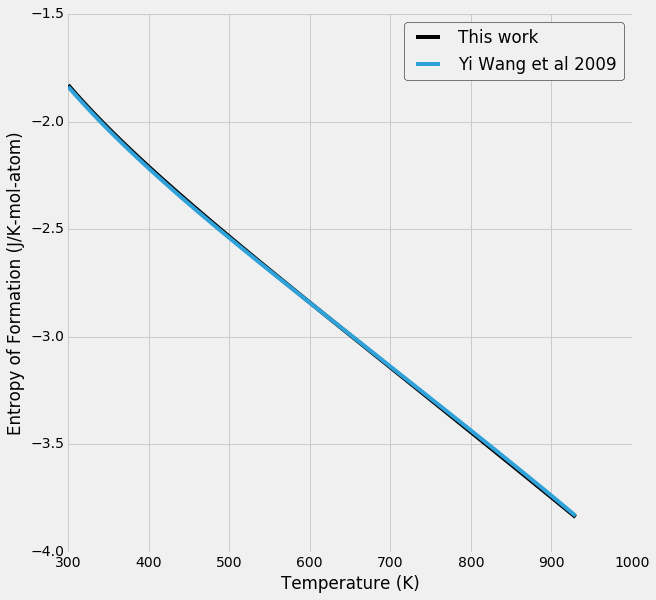

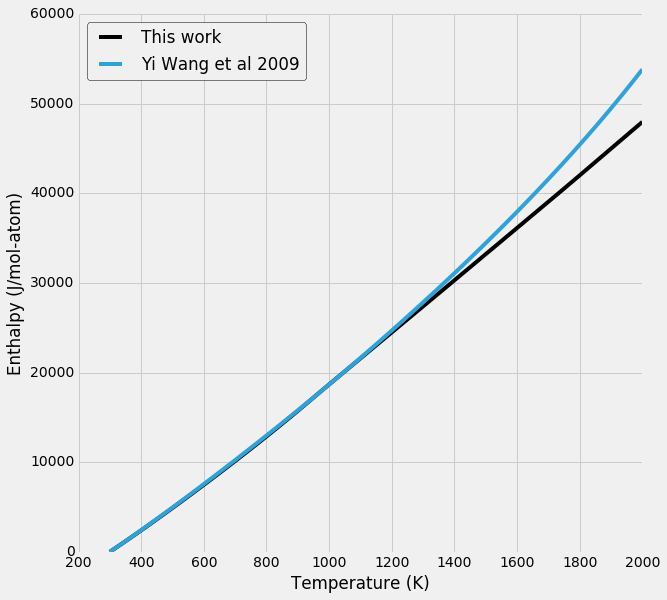

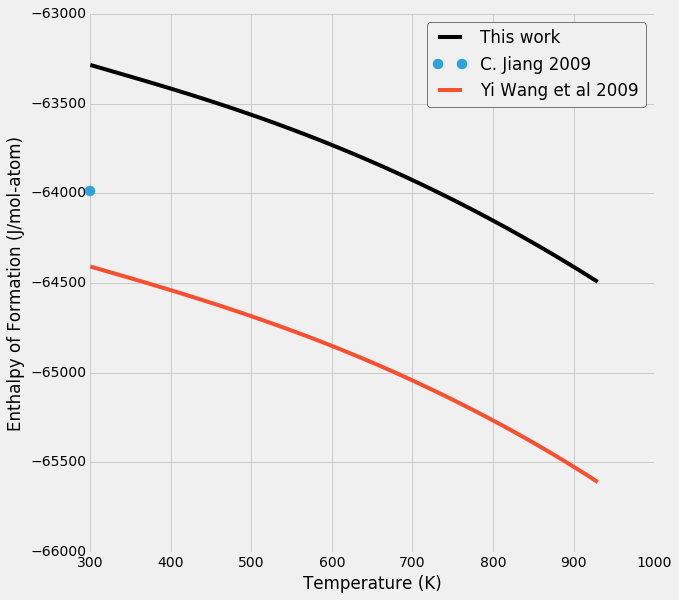

In [10]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", "NI", "VA"], [[0, 1]], datasets)

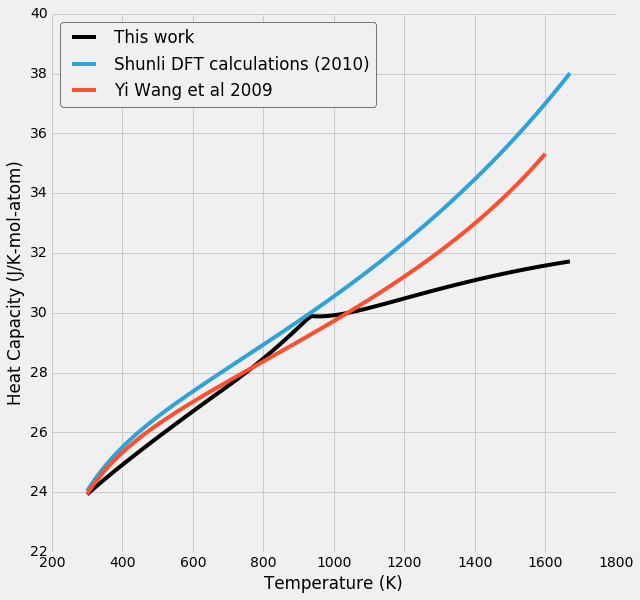

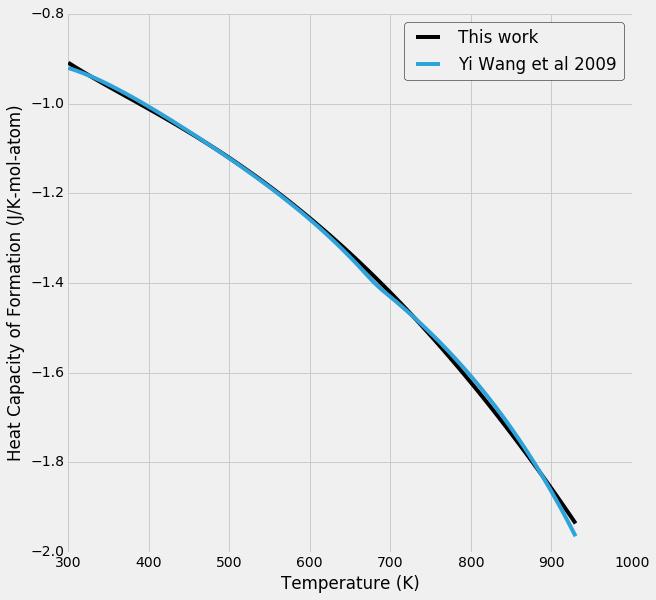

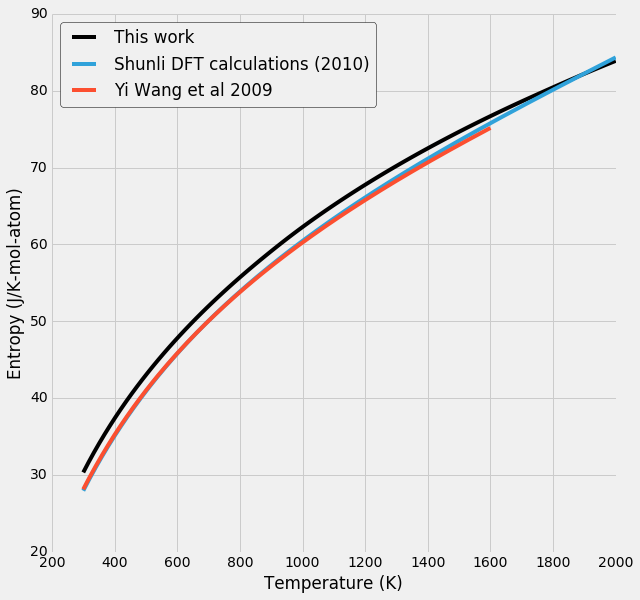

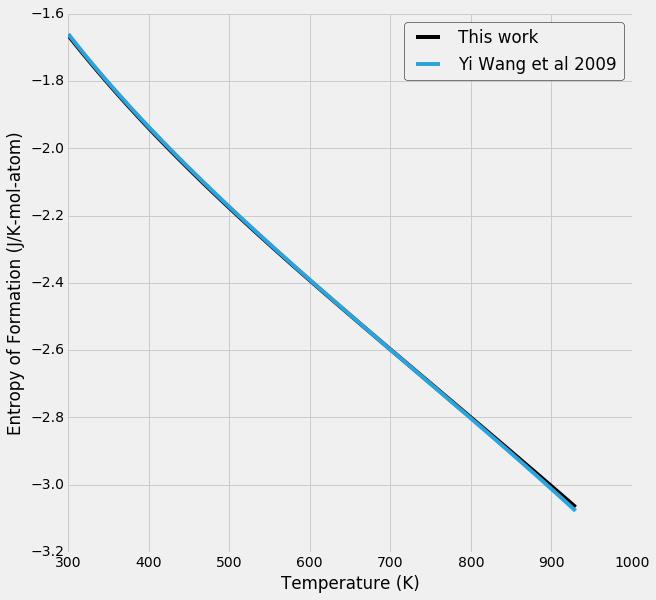

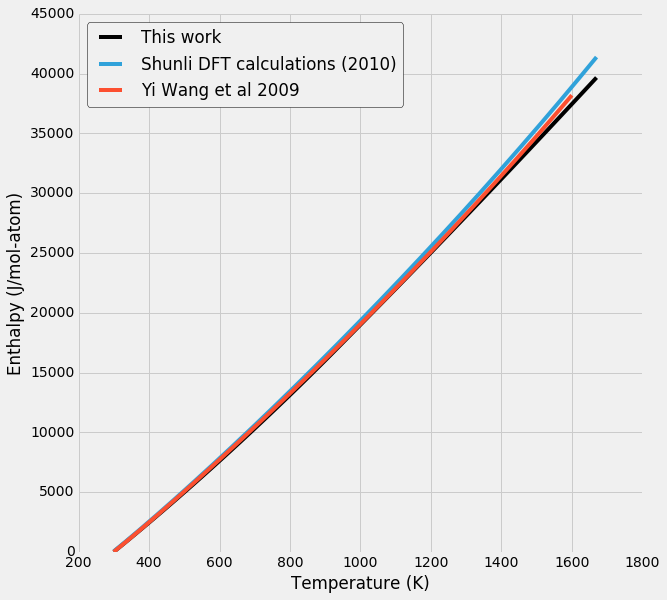

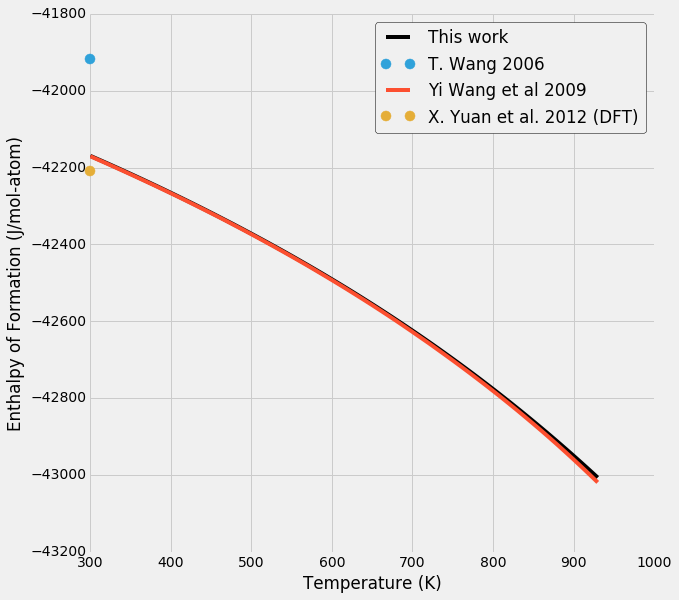

In [11]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "NI", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

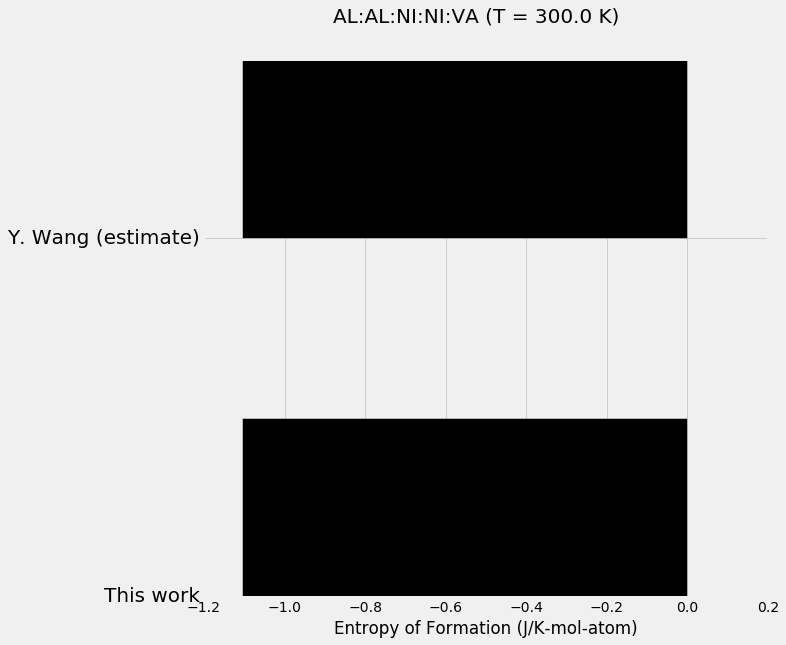

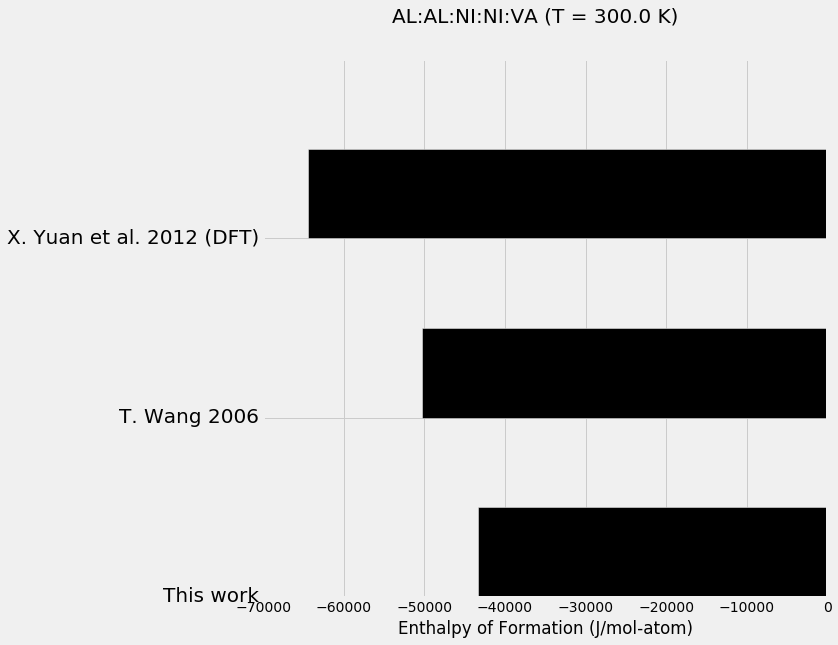

In [12]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "AL", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

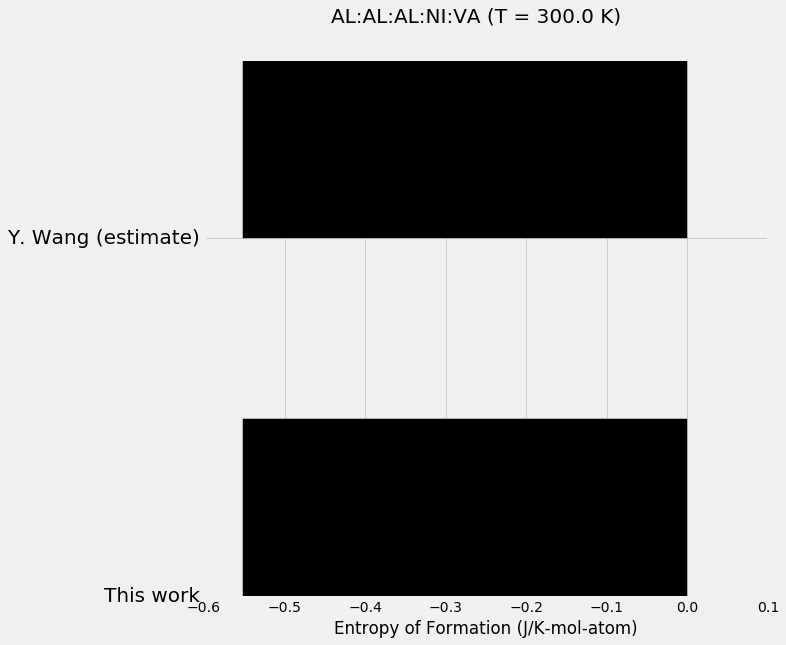

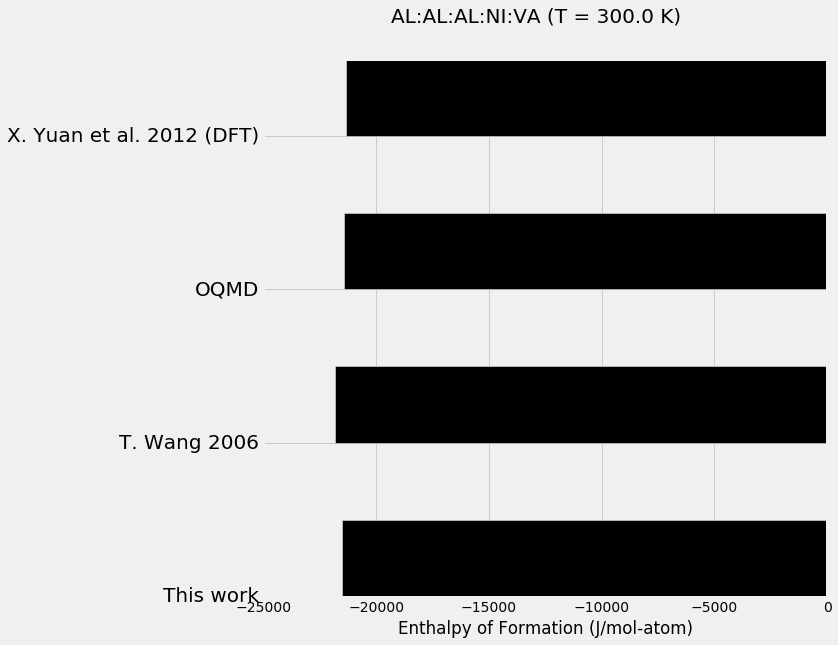

In [13]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "AL", "AL", "NI", "VA"], [[0,1,2,3]], datasets)

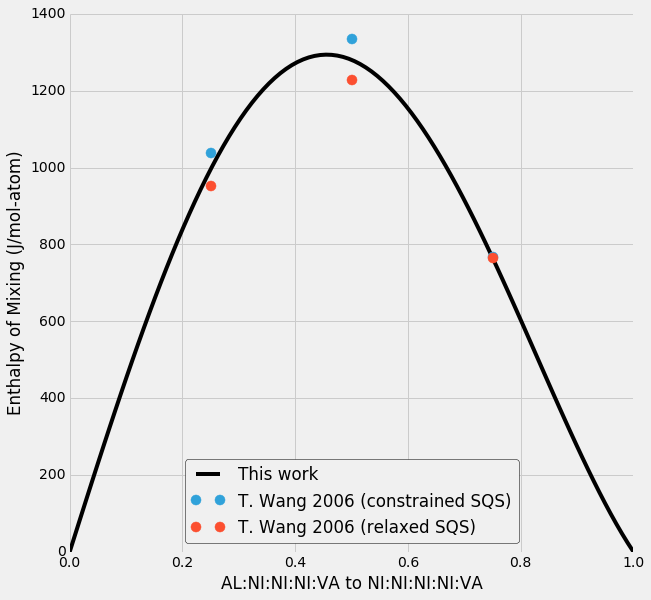

In [14]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

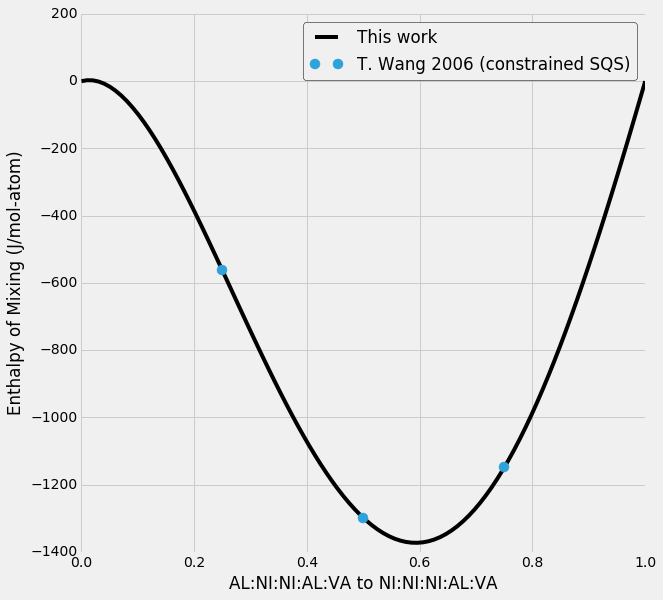

In [15]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "AL", "VA"], [[0,1,2,3]], datasets)

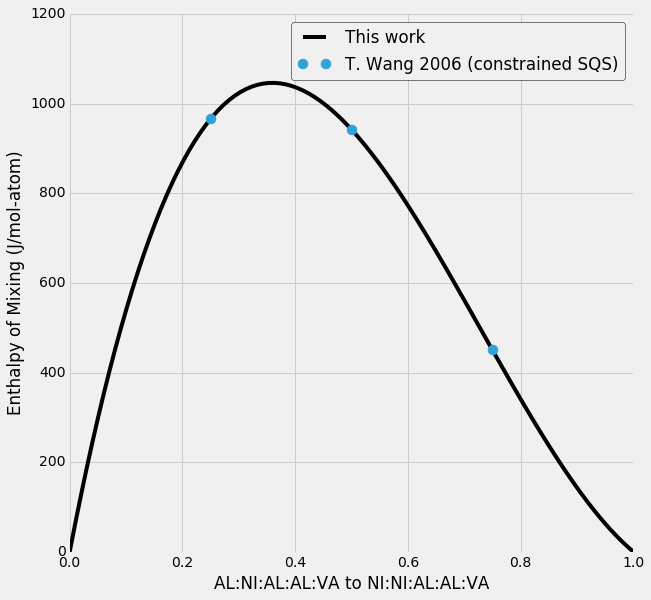

In [16]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "AL", "AL", "VA"], [[0,1,2,3]], datasets)

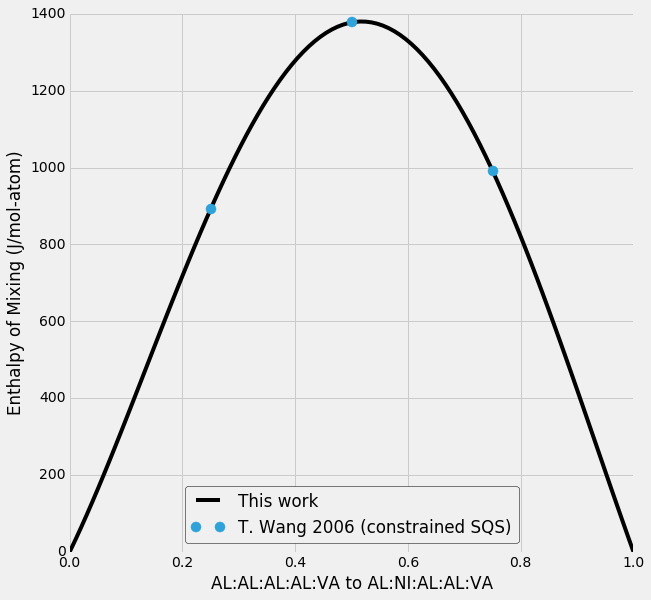

In [17]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", ["AL", "NI"], "AL", "AL", "VA"], [[0,1,2,3]], datasets)

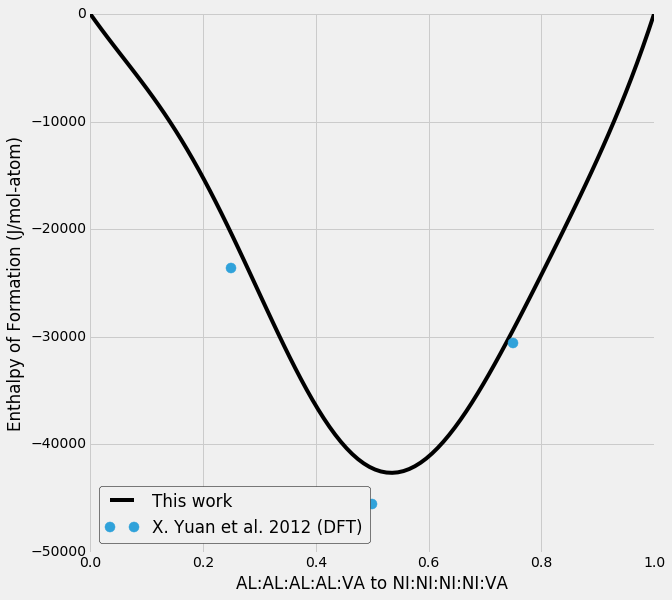

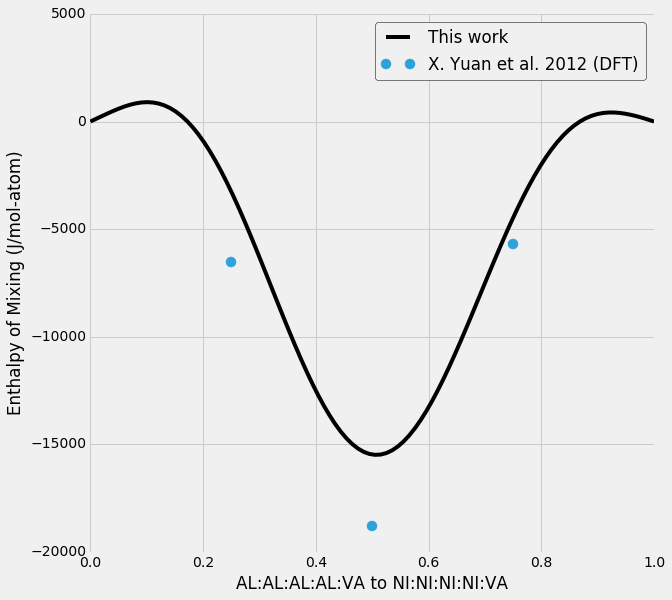

In [18]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], ["AL", "NI"], ["AL", "NI"], ["AL", "NI"], "VA"], [[0,1,2,3]], datasets)

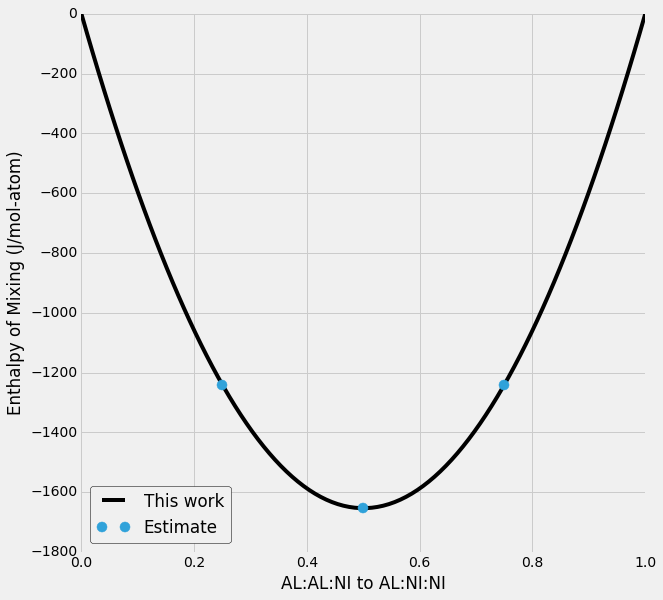

In [19]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "AL3NI2", ["AL", ["AL", "NI"], "NI"], None, datasets)

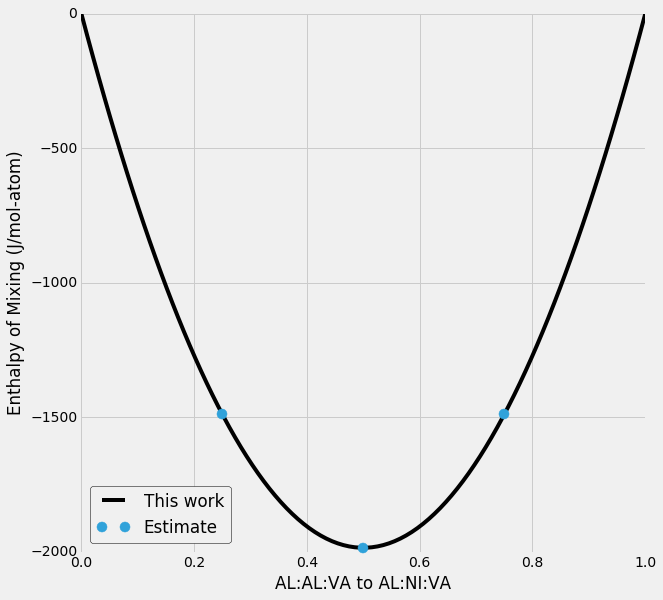

In [20]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "AL3NI2", ["AL", ["AL", "NI"], "VA"], None, datasets)

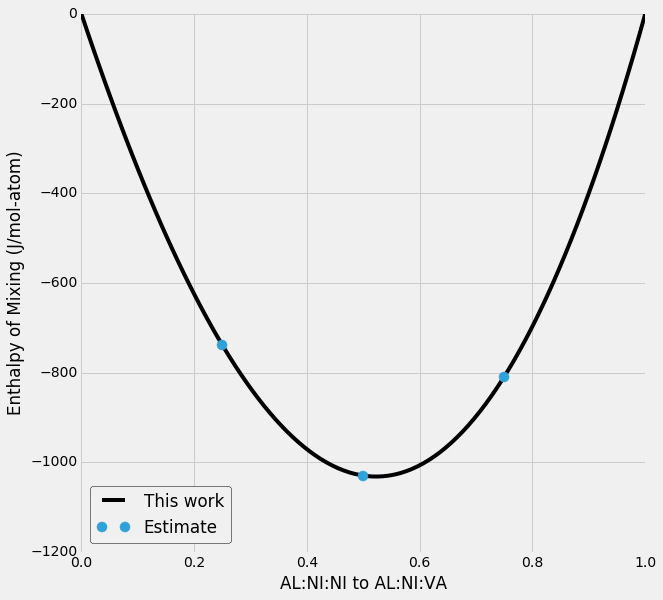

In [21]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "AL3NI2", ["AL", "NI", ["NI", "VA"]], None, datasets)

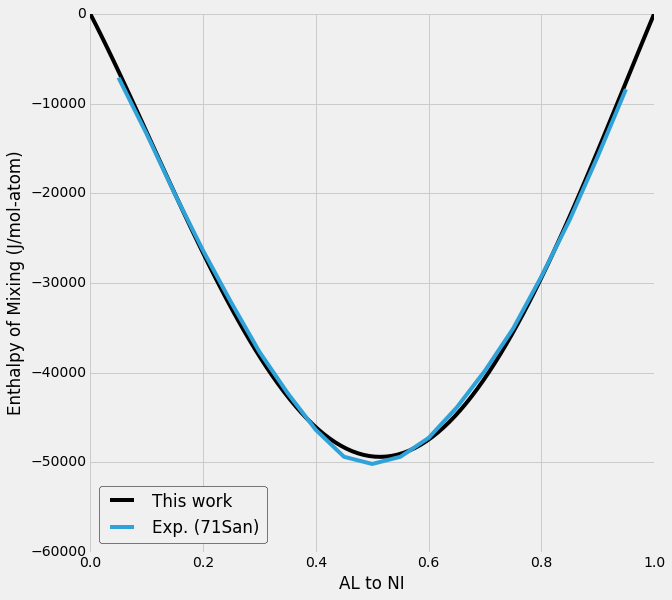

In [22]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "LIQUID", [["AL", "NI"]], None, datasets)

In [23]:
dbf.to_file('AlNi.tdb', if_exists='overwrite')

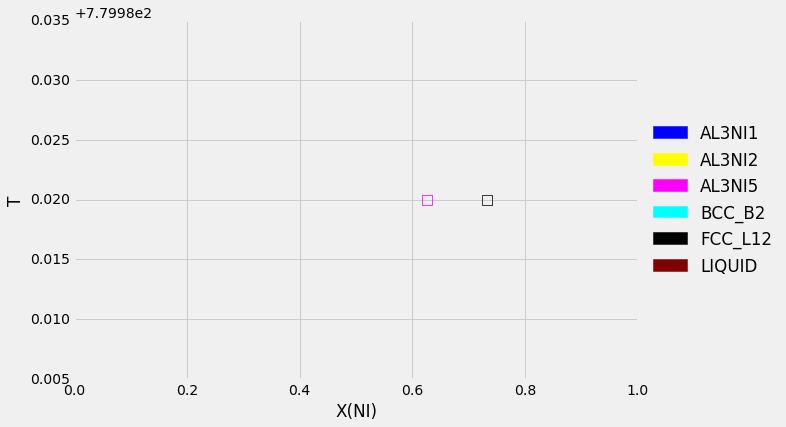

In [24]:
from paramselect import multi_plot
from pycalphad import binplot, Database
import pycalphad.variables as v
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,6))
#binplot(dbf, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()),
#        {v.X('NI'): (0,1,0.02), v.T: (300, 2000, 30), v.P: 101325}, ax=fig.gca())
multi_plot(None, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()), datasets, ax=fig.gca())
plt.show()

In [25]:
from pycalphad import calculate,Database
import pycalphad.variables as v
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
result = calculate(Database('AlNi.tdb'), ['AL', 'NI', 'VA'], ['FCC_L12', 'LIQUID'], pdens=5000, T=1645, P=1e5)

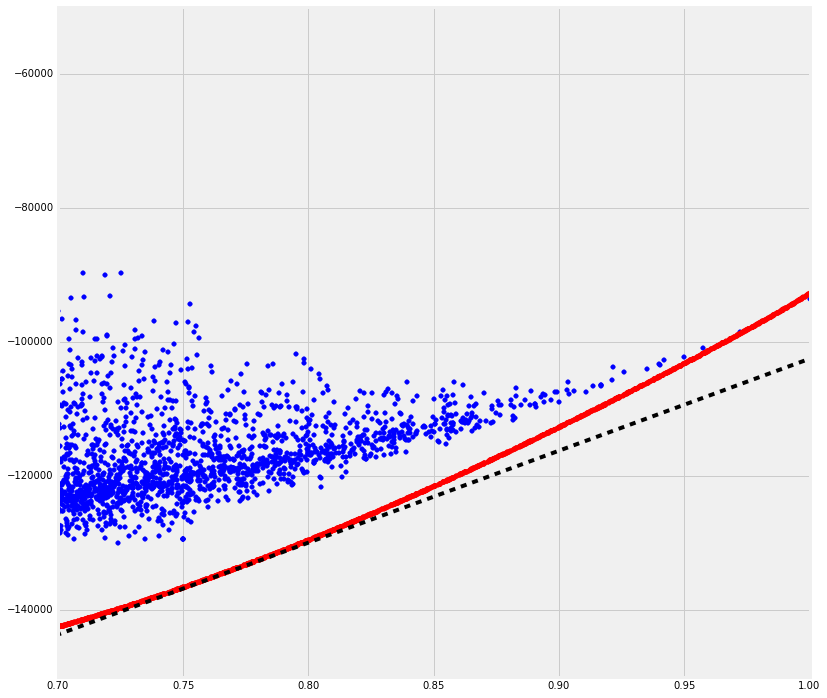

In [26]:
fig = plt.figure(figsize=(12,12))
bcc_energies_x = result.X.sel(component='NI').values[np.nonzero(result.Phase.values == 'FCC_L12')]
bcc_energies_y = result.GM.values[np.nonzero(result.Phase.values == 'FCC_L12')]
fig.gca().scatter(bcc_energies_x, bcc_energies_y, color='b')
liq_energies_x = result.X.sel(component='NI').values[np.nonzero(result.Phase.values == 'LIQUID')]
liq_energies_y = result.GM.values[np.nonzero(result.Phase.values == 'LIQUID')]
fig.gca().scatter(liq_energies_x, liq_energies_y, color='r')
fig.gca().plot([0, 1], [-239801.46331355, -102505.10323622], color='k', linestyle='--')
#fig.gca().plot([0, 1], [-1.147e5, -6.06e4], color='k', linestyle='--')
fig.gca().set_ylim((-150000, -5e4))
fig.gca().set_xlim((0.7, 1))
#fig.gca().axvline(0.733, color='k', linestyle='--')
plt.show()